# Alchemy API exercise

- Team: [CognitiveBuild-TW](https://apps.na.collabserv.com/communities/service/html/communitystart?communityUuid=8e4d5ccf-5360-452b-8436-2fc1e649c348)
- Author: Jesse Wei
- Date: 2016/06/19


<style>
pre {
    background-color: #f5f5f5;
}
.highlight {
    background: #f8f8f8;
}
</style>

## Alchemy Language
This is part of AlchemyAPI, other family member include Speech, Vision, and Data Insights.

### Scope

* [Keyword Extraction](http://www.alchemyapi.com/api/keyword-extraction) : Returns a list of topic keywords from the document
* [Relation Extraction](http://www.alchemyapi.com/api/relation-extraction) : Identifies Subject-Action-Object relations in the text
* Others..


### API Reference:
API 相關參考文件

* [Alchemy@Bluemix](https://console.ng.bluemix.net/catalog/services/alchemyapi/)
* [API doc](https://www.alchemyapi.com/api/keyword/htmlc.html), [API dev Doc](https://www.ibm.com/smarterplanet/us/en/ibmwatson/developercloud/alchemy-language/api/v1/?node#keywords)
* [Demo](http://www.alchemyapi.com/products/demo/alchemylanguage)
* [SDK](https://github.com/watson-developer-cloud?utf8=%E2%9C%93&query=sdk): [Python](https://github.com/watson-developer-cloud/python-sdk), [Node.js](https://github.com/watson-developer-cloud/node-sdk)
* **[This.API](https://github.com/watson-developer-cloud/python-sdk/blob/master/examples/alchemy_language_v1.py)**

### This Notebook Resource: 
和本篇Notebook 有關的資源

* [Community](https://apps.na.collabserv.com/communities/service/html/communitystart?communityUuid=8e4d5ccf-5360-452b-8436-2fc1e649c348)
* [Docker](https://hub.docker.com/r/jessewei/jupyter_nodejs/)
* Python learn[@Codecaemy](https://www.codecademy.com/learn/python),[@learnpython](http://www.learnpython.org/)
* [Python Cheatsheet](http://www.astro.up.pt/~sousasag/Python_For_Astronomers/Python_qr.pdf)
* [Markdown](https://help.github.com/articles/basic-writing-and-formatting-syntax/)
* [FB Messager bot](http://tsaprailis.com/2016/06/02/How-to-build-and-deploy-a-Facebook-Messenger-bot-with-Python-and-Flask-a-tutorial)

### Q&A 

- Update: Source from example have minor changed from 3.x -> 2.7 for this engine


SYNTAX|3.x|2.7
---|---|---
print function/statement|print(x)|print x or print(x)
keyword argument|relations(max_items=5, url=url)|relations(5, url)
- Q: **Keyword API** issue, return status ok, but empty keyword list why?
    - ANS: Parameter in examples, max_items=5, is not work. Fixed as below sample.
- Q: Is the  tasklist@markdown not working on jupyter 3.1.0?
    - ANS: No, test fail
- Q: Is **Keyword API** support Chinese ?
    - ANS: No, Only for English, German, French, Italian, Portuguese, Russian, Spanish and Swedish. [Ref to doc](https://www.ibm.com/smarterplanet/us/en/ibmwatson/developercloud/doc/alchemylanguage/)
- Q: Is **Relation API** support Chinese ?
    - ANS: No, test fail
    
- Q: *Why **API** all fail rerun at morning ?*
    - ANS: It is not your fault, caused by ....
    

### Exercise purpose and procedure
1. Change to your apikey, replace the myAPIkey and myURL to yours
2. Follow steps to run and review
3. Checkout API doc, write our own samples
4. Review visual output
5. Build application, a library for Facebook Messager robot?

In [1]:
# DEMO Program Entry Point
# 1. Change to your apikey

import json
from os.path import join, dirname
from watson_developer_cloud import AlchemyLanguageV1

#''
myAPIkey = 'ChangeToYourKey' 
#myURL = 'https://developer.ibm.com/watson/blog/2015/11/03/price-reduction-for-watson-personality-insights/'
myURL = 'http://www.washingtonpost.com/blogs/capital-weather-gang/wp/2013/08/14/d-c-area-forecast-ultra-nice-weather-dominates-next-few-days/'

In [2]:
# Find api_key after register your Bluemix AlchemyLanguage service
# 2. Follow steps to run and review

alchemy_language = AlchemyLanguageV1(api_key= myAPIkey)

# Set url to the content you want analysis
url = myURL

In [3]:
# follow examples, but skip indent for test only
print json.dumps(alchemy_language.targeted_sentiment(text='I love cats! Dogs are smelly.', targets=['cats', 'dogs'], language='english'))

{"status": "OK", "usage": "By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html", "totalTransactions": "1", "results": [{"text": "cats", "sentiment": {"score": "0.683259", "type": "positive"}}, {"text": "dogs", "sentiment": {"score": "-0.731679", "type": "negative"}}]}


In [4]:
# Keyword Extraction, follow examples
print(json.dumps(alchemy_language.keywords(2,url=url),  indent=2))

{
  "status": "OK", 
  "totalTransactions": "1", 
  "language": "english", 
  "url": "https://www.washingtonpost.com/news/capital-weather-gang/wp/2013/08/14/d-c-area-forecast-ultra-nice-weather-dominates-next-few-days/", 
  "keywords": [
    {
      "relevance": "0.944435", 
      "text": "upper 70s"
    }, 
    {
      "relevance": "0.753141", 
      "text": "low humidity"
    }, 
    {
      "relevance": "0.620124", 
      "text": "partly cloudy skies"
    }, 
    {
      "relevance": "0.575197", 
      "text": "comfortable upper 50s"
    }, 
    {
      "relevance": "0.546737", 
      "text": "slightly warmer lows"
    }, 
    {
      "relevance": "0.504522", 
      "text": "related traffic news"
    }, 
    {
      "relevance": "0.491113", 
      "text": "Confidence"
    }, 
    {
      "relevance": "0.419809", 
      "text": "highs"
    }, 
    {
      "relevance": "0.402111", 
      "text": "better chance"
    }, 
    {
      "relevance": "0.39791", 
      "text": "sunny skies"
 

In [5]:
# Relation Extraction, follow examples
print(json.dumps(alchemy_language.relations(url=url), indent=2))

{
  "status": "OK", 
  "usage": "By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html", 
  "relations": [
    {
      "action": {
        "text": "is", 
        "verb": {
          "text": "be", 
          "tense": "present"
        }, 
        "lemmatized": "be"
      }, 
      "subject": {
        "text": "A refreshing burst of Canadian coolness"
      }, 
      "object": {
        "text": "sweeping into our area"
      }, 
      "sentence": "A refreshing burst of Canadian coolness is now sweeping into our area, eradicating the heat and humidity of the past few days."
    }, 
    {
      "action": {
        "text": "sweeping", 
        "verb": {
          "text": "sweep", 
          "tense": "present"
        }, 
        "lemmatized": "sweep"
      }, 
      "subject": {
        "text": "A refreshing burst of Canadian coolness"
      }, 
      "sentence": "A refr

## The API

- '3. Checkout API doc, write our own samples
- Target: Plot top ten keywords

### Keyword Extraction  

```
alchemy_language.keywords(url=url)
```
**Keywords** - important topics in your content that are typically used when indexing data, generating tag clouds, or when searching. The AlchemyLanguage service automatically identifies supported languages (see the next bullet) in your input content, and then identifies and ranks keywords in that content. Sentiment can also be associated with each keyword by using the AlchemyLanguage stiment analysis capabilities.

The argument _ **  maxLens ** not works _ 

### Relation Extraction 
```
alchemy_language.relations(url=url)
```

**Relations** - identifies subject, action, and object relations within sentences in the input content. After parsing sentences into subject, action, and object form, the Relation Extraction API functions can use this information for subsequent processing by other AlchemyLanguage functions such as entity extraction, keyword extraction, sentiment analysis, and location identification. Relation information can be used to automatically identify buying signals, key events, and other important actions.

### Reference Library
- [Plotly](https://plot.ly/ipython-notebooks/)

In [6]:
rtn = alchemy_language.keywords(url=url)
keywords= rtn["keywords"]
print keywords[1:10]

[{u'relevance': u'0.753141', u'text': u'low humidity'}, {u'relevance': u'0.620124', u'text': u'partly cloudy skies'}, {u'relevance': u'0.575197', u'text': u'comfortable upper 50s'}, {u'relevance': u'0.546737', u'text': u'slightly warmer lows'}, {u'relevance': u'0.504522', u'text': u'related traffic news'}, {u'relevance': u'0.491113', u'text': u'Confidence'}, {u'relevance': u'0.419809', u'text': u'highs'}, {u'relevance': u'0.402111', u'text': u'better chance'}, {u'relevance': u'0.39791', u'text': u'sunny skies'}]


In [7]:
rtn = alchemy_language.relations(url=url)
relations =  rtn["relations"]
print relations[1:5]

[{u'action': {u'text': u'sweeping', u'verb': {u'text': u'sweep', u'tense': u'present'}, u'lemmatized': u'sweep'}, u'subject': {u'text': u'A refreshing burst of Canadian coolness'}, u'sentence': u'A refreshing burst of Canadian coolness is now sweeping into our area, eradicating the heat and humidity of the past few days.'}, {u'action': {u'text': u'is', u'verb': {u'text': u'be', u'tense': u'present'}, u'lemmatized': u'be'}, u'subject': {u'text': u'The weekend'}, u'object': {u'text': u'more of a mixed bag'}, u'sentence': u' The weekend is more of a mixed bag with Saturday having the better chance to stay dry and Sunday showing an increasing risk of showers, but still a good bit of uncertainty at this point.'}, {u'action': {u'text': u'showing', u'verb': {u'text': u'show', u'tense': u'present'}, u'lemmatized': u'show'}, u'subject': {u'text': u'Sunday'}, u'object': {u'text': u'an increasing risk of showers'}, u'sentence': u' The weekend is more of a mixed bag with Saturday having the better

In [8]:
# Initial plot 
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Show top 10 in plot
n = 10
X = np.arange(n)

In [9]:
# Convert string dict to float list
fixed_list = [x.items() for x in keywords]
vals,keys = zip(*fixed_list)
value = zip(*vals)
keyword = zip(*keys)
s = list((value[1][:n]))
Y=[float(i) for i in s]
#print keyword[1][1]

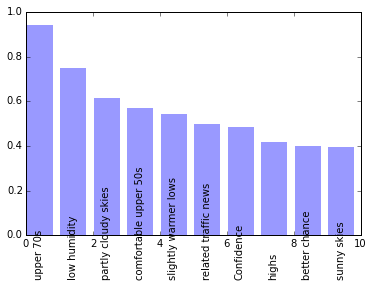

In [10]:
# Plot
# 4. Review visual output
plt.bar(X, Y, facecolor='#9999ff', edgecolor='white')
for x,y in zip(X,Y):
    plt.text(x+0.4, -.2, keyword[1][x], ha='center', va= 'bottom', rotation='vertical')
#plt.ylim(0,+1)
plt.show()    

## Python reference

### JSON process in Python

print json.dumps(alchemy_language.keywords(5, url), 2)

JSON to Python|Python to JSON
--|--
![json](json-j2p.jpg)|![json](json-p2j.jpg)